- Nama : Dia Kurnia Dewi
- Batch : 06
- Assignment : Milestone 1 Phase 1

# Objective
- Melakukan eksplorasi data.
- Melakukan cleaning dan pre-processing terhadap data.
- Melakukan training pada beberapa model dan evaluasi.
- Mengimplementasikan model inference.
- Menarik kesimpulan dari hasi eksplorasi dan training model.

## Data Understanding
Data yang digunakan adalah data terkait telemarketing Bank Portugis. 
- `age` : usia nasabah  (numeric)
- `job` : jenis pekerjaan yang dimiliki oleh nasabah (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- `marital` : status pernikahan (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- `education` : jenjang pendidika terakhir dar nasabah (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- `default`: informasi apakah nasabah memiliki kepemilikan kredit atautidak (categorical: 'no','yes','unknown')
- `housing`: informasi apakah pelanggan memiliki kredit perumahan  (categorical: 'no','yes','unknown')
- `loan`: informasi apakah pelanggan memiliki pinjaman pribadi (categorical: 'no','yes','unknown')
- `contact`: jenis komunikasi dengan nasabah (categorical: 'cellular','telephone')
- `month`: bulan ketika nasabah dihubungi (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `day_of_week`: hari ketika nasabah dihubungi (categorical: 'mon','tue','wed','thu','fri')
- `duration`: durasi panggilan Ketika nasabah dihubungi (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- `campaign`: jumlah penawaran produk kepada nasabah melalui telemarketing (numeric, includes last contact)
- `pdays`: jeda waktu untuk promosi berdasarkan pada hari terakhir dihubungi(numeric; 999 means client was not previously contacted)
- `previous`: intensitas kontak dengan nasabah sebelum penawaran dibuat (numeric)
- `poutcome`: tanggapan dari penawaran telemarketing sebelumnya (categorical: 'failure','nonexistent','success')
- `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
- `cons.price.idx`: consumer price index - monthly indicator (numeric)
- `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
- `euribor3m`: euribor 3 month rate - daily indicator (numeric)
- `nr.employed`: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- `y`: has the client subscribed a term deposit? (binary: 'yes','no')

# 1. Import Library

In [151]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.ticker as mtick 


import warnings

warnings.filterwarnings('ignore')

# 2. Load Data

In [152]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [154]:
df.shape

(41188, 21)

Dataset `Bank Telemarketing` memiliki `41188` baris dan `21` kolom, dari `21` kolom terdapat satu kolom target yaitu `y` yang merepresentasikan apakah nasabah melakukan deposito atau tidak. 

# 3. EDA

In [155]:
cats = df.select_dtypes(include=['object'])
nums = df.select_dtypes(include=['int','float'])

## Distribution of Target Variable

Text(0.5, 1.0, '% of Subscribed Term Deposit')

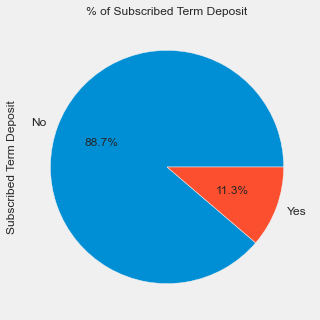

In [156]:
ax = (df['y'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Subscribed Term Deposit',fontsize = 12)
ax.set_title('% of Subscribed Term Deposit', fontsize = 12)

Berdasarkan informasi dari pie chart diatas diperoleh informasi bahwa dari keseluruhan nasabah `88.7%` tidak melakukan pembelian deposito dan `11.3%` melakukan pembelian deposito. Selisih yang cukup signifikan antara kedua value yang dimiliki oleh kolom target menunjukkan bahwa data `Bank Telemarketing` bersifat imbalance.

## Analysis Numerical Data

#### Bagaimana hasil statistik deskriptif dari data numerik?

In [157]:
df[nums.columns.to_list()].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Berdasarkan statistik deskriptif pada data numerik diatas diperoleh beberapa informasi:
- Usia nasabah berada pada rentang `17` hingga `98` tahun, dengan usia rata-rata adalah `40` tahun.
- Durasi panggilan Ketika nasabah dihubungi berada pada rentang `0` hingga `4918` detik, dengan rata-rata `258` detik dan median `180`. Pada feature durasi antara mean dan median memiliki perbedaan yang cukup signifikan sehingga besar kemungkinan kolom tersebut terdistribusi skewed. Selain itu, pada kolom tersebut juga memiliki  value `0` yang bisa diartikan bahwa tidak ada contact terhadap nasabah.
- Employment variation rate memiliki rentang nilai `-3.4` hingga `3`, dengan rata-rata `0.08`.
- nr.employed memiliki rata-rata `5167`.

In [158]:
def kde_plot(column):
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df["y"]== 'yes'][column],color='blue',label='Subscribed: Yes', shade=True)
    sns.kdeplot(df[df["y"]== 'no'][column],color='red',label='Subscribed: No', shade=True)
    plt.legend()
    plt.title("Distribution of {} based on deposito subscription".format(column))
    plt.xlabel(column)
    plt.show()

#### Bagaimana distribusi `duration `terhadap subscribe deposit ?

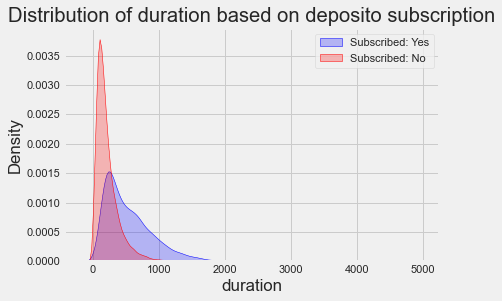

In [159]:
kde_plot('duration')

Hasil kde plot diatas menunjukkan bahwa tingkat nasabah melakukan pembelian deposit cukup tinggi ketika durasi marketing tidak lebih dari `1000` detik.

#### Bagaimana distribusi usia terhadap subscribe deposit ?

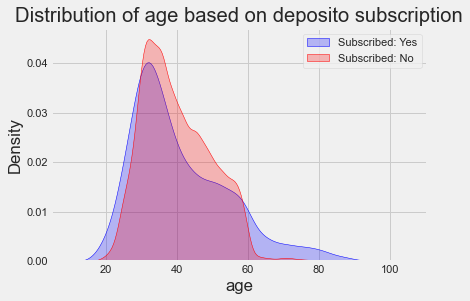

In [160]:
kde_plot('age')

Nasabah yang berusia kurang dari `40` tahun lebih besar kemungkinannya untuk melakukan pembelian deposito. Hal ini cukup wajar karena berdasarkan statistik deskriptif rata-rata usia nasabah adalah `40` tahun.

### Analysis kategorikal data

In [163]:
df[cats.columns.to_list()].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Pada data kategorikal diperoleh beberapa informasi sebagai berikut:
- Pekerjaan yang paling banyak dilakukan oleh nasabah adalah sebagai `admin`.
- Tingkat pendidikan terbanyak yang dimiliki oleh nasabah ada `university degree`.
- Sebagain besar nasabah memiliki pinjaman rumah.
- Cara telemarketing yang banyak digunakan untuk menghubungi nasabah, menggunakan `celluler`.
- Sebagain besar dari nasabah tidak memiliki `loan`

#### Value Counts of Categorical Data

In [164]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('**'*25)
    print()

Value count kolom job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
**************************************************

Value count kolom marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
**************************************************

Value count kolom education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
**************************************************

Value count kolom default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int

- Pada fitur job, sebagaian besar nasabah memiliki pekerjaan sebagai `admin`
- Bulan mei menjadi bulan dengan telemarketing terbanyak.
- Fitur marital status memiliki 4 jenis value, `married`, `single`, `divorce` dan `unknown`, dengan sebagain besar nasabah memiliki status `married` dan hanya 80 yang statusnya `unknown`.

In [302]:
data = df.copy()
# function to plot categorical data
def countplot(label, dataset):
  plt.figure(figsize=(6,4))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()
    
# function to plot proportion of y by categories
def proportion_y(column):
    plt.figure(figsize=(6,4))
    colors = ['#4D3425','#E4512B']
    contract_churn = df.groupby([column,'y']).size().unstack()
    contract_churn

    ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                    width = 0.3,
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (6,4),
                                                                    color = colors)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc='best',prop={'size':14},title = 'Subscribed')
    ax.set_ylabel('% Customers',size = 14)
    ax.set_title('Subscribed by {}'.format(column),size = 14)

    # Code to add the data labels on the stacked bar chart
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 14)

#### Bagaimana distribusi dari metode `contact` terhadap subscription deposito?

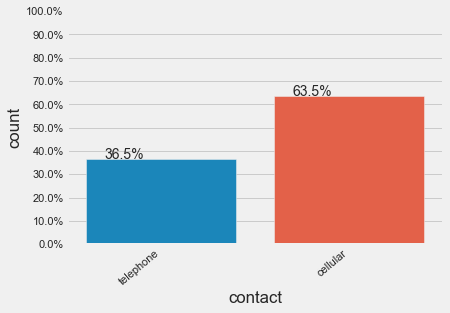

(None, None)

<Figure size 432x288 with 0 Axes>

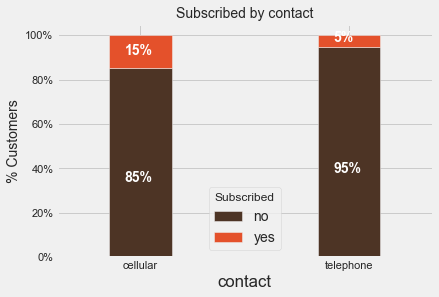

In [166]:
countplot('contact', df), proportion_y('contact')

Hasil dari kedua bar plot diatas menunjukkan bahwa jumlah nasabah yang dihubungi menggunakan `celuller` lebih tinggi dari pada menggunakan `telephone`. Sedangkan pada proporsi pembelian deposito, nasabah yang dihubungi menggunakan `celluler` lebih besar kemungkinannya untuk membeli deposito daripada yang dihubungi menggunakan `telephone`. 

#### Bagaimana distribusi dari status pernikahan terhadap subscription deposito?

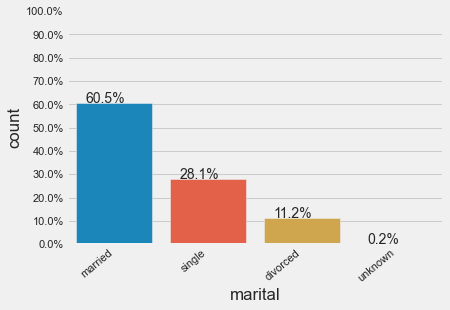

(None, None)

<Figure size 432x288 with 0 Axes>

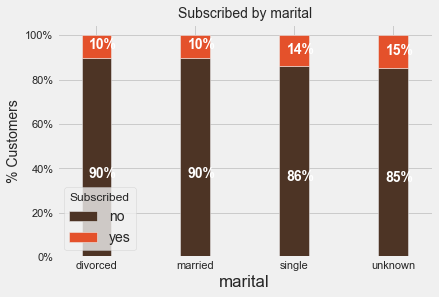

In [167]:
countplot("marital", df), proportion_y('marital')

Secara keseluruhan nasabah dengan status `single` lebih besar kemungkinannya untuk membeli deposito dari pada nasabah yang telah menikah ataupun divorced.

#### Bagaimana distribusi `house` loan terhadap subscription?

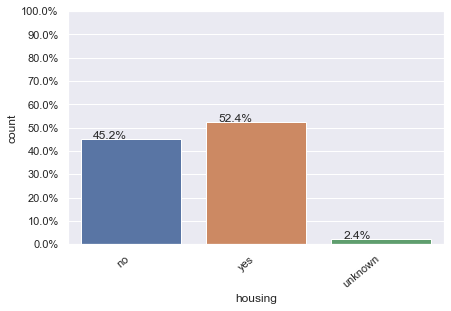

(None, None)

<Figure size 432x288 with 0 Axes>

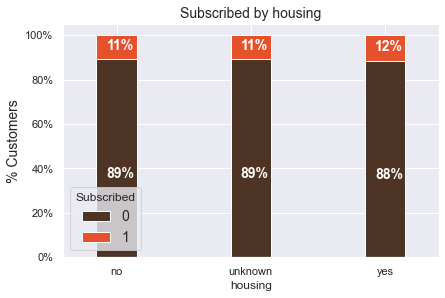

In [303]:
countplot("housing", df), proportion_y('housing')

## Correlation

In [168]:
# change value of target column into numeric (0,1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

<AxesSubplot:>

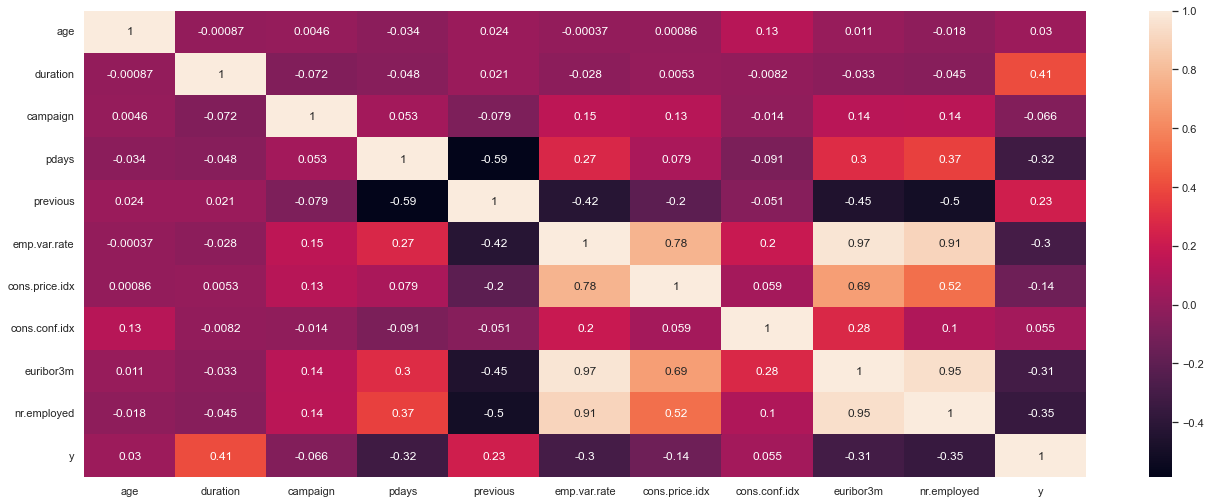

In [169]:
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(df.corr(), annot=True)

Hasil dari heatmap diatas menunjukkan bahwa kolom target `y` memiliki korelasi yang cukup tinggi dengan fitur `duration`, `pdays` dan `nr.employed`.

# 4. Data Cleaning

### Handling Duplicated Data

In [170]:
df.duplicated().sum()

12

In [171]:
df.drop_duplicates(inplace=True)

In [172]:
df.duplicated().sum()

0

Pada handling duplikasi data ditemukan sebanyak `12` data yang terduplikasi, sehingga dilakukan drop pada tersebut.

### Handling Missing Value

In [173]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,missing values,% missing_values
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


Tidak ditemukan adanya missing value pada data.

### Handling Outlier

In [174]:
nums = df.select_dtypes(include=['int','float'])

In [175]:
for k, v in nums.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]

    print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.14%
Column duration outliers = 7.20%
Column campaign outliers = 8.22%
Column pdays outliers = 100.00%
Column previous outliers = 100.00%
Column emp.var.rate outliers = 0.00%
Column cons.price.idx outliers = 0.00%
Column cons.conf.idx outliers = 1.08%
Column euribor3m outliers = 0.00%
Column nr.employed outliers = 0.00%
Column y outliers = 100.00%


# 5.Splitting Data

In [176]:
X = df.drop(columns="y")
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32940, 20), (8236, 20), (32940,), (8236,))

# 6. Pre-processing

In [177]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [178]:
nums = df.select_dtypes(include=['int','float']).drop(columns="y").columns.to_list()

cats = df.select_dtypes(include=['object']).columns.to_list()

In [180]:
preprocessor = ColumnTransformer([
    ("numeric", MinMaxScaler(), nums),
    ("categoric", OneHotEncoder(), cats)
])

# 7. Model Implementation and Evaluation <a class="anchor" id="7"></a>

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings

warnings.filterwarnings('ignore')

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

def eval_classification(model, predtrain, predtest, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Train Set): %.3f" % accuracy_score(ytrain, predtrain))
    print("Accuracy (Test Set): %.3f" % accuracy_score(ytest, predtest))
    print('\n')
    print("Precision (Train Set): %.3f" % precision_score(ytrain, predtrain))
    print("Precision (Test Set): %.3f" % precision_score(ytest, predtest))
    print('\n')
    print("Recall (Train Set): %.3f" % recall_score(ytrain, predtrain))
    print("Recall (Test Set): %.3f" % recall_score(ytest, predtest))
    print('\n')
    print("F1-Score (Train Set): %.3f" % f1_score(ytrain, predtrain))
    print("F1-Score (Test Set): %.3f" % f1_score(ytest, predtest))

def roc_auc_evaluation(x_test, y_test, model):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label = '(area= %0.2f)' % auc(fpr,tpr))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc= 'lower right')
    plt.show()
    

def show_feature_importance(model):
    # feature_importances_ dari highest ke lowest
    sorted_idx = np.argsort(model.feature_importances_)
    sorted_idx = sorted_idx[::-1]

    # plot feature importances
    plt.figure(figsize=(12,6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[sorted_idx],
            color="r", align="center")
    plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [234]:
# mendefinisikan pipeline untuk keseluruhan model
pipeline_logreg = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

pipeline_knn = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

pipeline_svm = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500, probability=True))
])

pipeline_tree = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier())
])

pipeline_rfc = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

pipeline_nb = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

pipeline_adaboost = Pipeline([
    ('prep', preprocessor),
    ('algo', AdaBoostClassifier())
])

pipeline_xgboost = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())
])

In [184]:
# mendefinisikan parameter tunning untuk setiap model
parameter_logreg = {
                  'algo__penalty': ['l2','elasticnet', 'none'],
                  'algo__C' : [0.001, 0.01, 0.1, 1],
                  'algo__solver': ['newton-cg', 'lbfgs', 'saga']
                }

parameter_svm = {
                'algo__gamma': np.logspace(-2, 10, 3),
                'algo__C': np.logspace(-9, 3, 3)
            }

parameter_tree = { 
                'algo__max_depth': [1,5,10],
                'algo__min_samples_split': [2,3,5],
                'algo__min_samples_leaf': [2,3,5],
            }

parameter_rfc = {
                 'algo__max_depth': [20, 50, 80],
                 'algo__max_features': [0.3, 0.6, 0.8],
                 'algo__min_samples_leaf': [1, 5, 10],
                }

parameter_knn = { 
                'algo__n_neighbors': [1,3,5],
                }

parameter_adboost =  { 
               'algo__n_estimators': [100, 500, 1000],
               'algo__learning_rate': [0.001, 0.1, 1]
                }

parameter_xgb =  { 
        'algo__gamma' : [float(x) for x in np.linspace(0, 1, num = 3)],
        'algo__lambda' : [float(x) for x in np.linspace(0, 1, num = 3)],
        'algo__alpha' : [float(x) for x in np.linspace(0, 1, num = 3)]
    }

### 7.1 Logistic Regression

#### Banchmark Model

In [267]:
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[7119  189]
 [ 554  374]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.911
Accuracy (Test Set): 0.910


Precision (Test Set): 0.674
Precision (Test Set): 0.664


Recall (Test Set): 0.402
Recall (Test Set): 0.403


F1-Score (Train Set): 0.504
F1-Score (Test Set): 0.502
******************************************************************************************


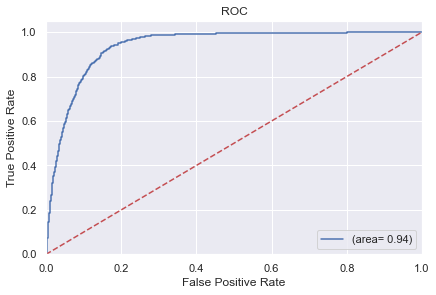

In [208]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_logreg.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)
print('******'*15)

# model evaluation
y_pred_train = pipeline_logreg.predict(X_train)
y_pred_test = pipeline_logreg.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_logreg, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
roc_auc_evaluation(X_test, y_test, pipeline_logreg)

Hasil evaluasi matrics pada base model `LogisticRegression` menunjukkan bahwa nilai `accuracy` dari model cukup bagus yaitu `0.91` dan tidak ditemukan adanya overfitting maupun underfitting. Sedangkan pada matrics `f1-score` diperoleh hasil evaluasi yang cukup rendah `0.4`. Terakhir untuk matriks `ROC-AUC` diperoleh hasil yang cukup baik yaitu `0.94`. Matrics `ROC-AUC` dapat dipertimbangkan menjadi matrics utama mengingat data yang kita miliki bersifat imbalance.

#### Logistic Regression with Hyperparameter Tunning

In [191]:
logreg_tunning = GridSearchCV(pipeline_logreg, parameter_logreg, cv=5, n_jobs=-1, verbose=1)
logreg_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
 

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                 

Best Parameter :
 {'algo__C': 0.001, 'algo__penalty': 'l2', 'algo__solver': 'newton-cg'}
******************************************************************************************
Confussion Matrix:
 [[7308    0]
 [ 928    0]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.887
Accuracy (Test Set): 0.887


Precision (Train Set): 1.000
Precision (Test Set): 0.000


Recall (Train Set): 0.000
Recall (Test Set): 0.000


F1-Score (Train Set): 0.001
F1-Score (Test Set): 0.000
******************************************************************************************


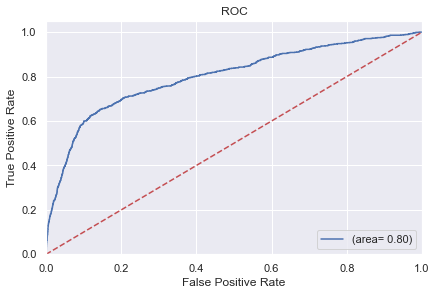

In [213]:
# Access the best set of parameters
best_pipe_logreg = logreg_tunning.best_estimator_
best_params_logreg = logreg_tunning.best_params_
best_score_logreg = logreg_tunning.best_score_
print('Best Parameter :\n',best_params_logreg)

print('******'*15)
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_logreg.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = logreg_tunning.predict(X_train)
y_pred_test = logreg_tunning.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(logreg_tunning, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, logreg_tunning)


Hasil evaluasi matrics model `LogisticRegression` menggunakan hyperparameter tunning dengan `GridSearchCV` diperoleh parameter terbaik adalah `algo__C: 0.001`, `algo__penalty: l2`, `algo__solver: newton-cg`. Berdasarkan confussion matrix diperoleh nilai `TN ` nol, sehingga hal ini menyebabkan nilai matrics `precision`, `recall` dan `f1-score` juga nol. Sedangkan pada matrics `accuracy` diperoleh hasil yang cukup bagus yaitu `0.8`, hal ini cukup wajar karena rumus dari accuracy sendiri memiliki pembilang yang merupakan penjumlahan antara `TP` dan `TN`, pada confussion matrix sendiri `TN` diketahui. Untuk `ROC-AUC` diperoleh nilai evaluasi sebesar `0.8`. Hasil dari keseluruhan evaluasi base model `LogisticRegression` dan `Logisticregression` dengan hyperparamater tunning menujukkan bahwa, pada kasus ini base model `LogisticRegression` lebih baik dari pada setelah dilakukan tunning.

### 7.2 SVM

### SVM Base Model

In [271]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[6256 1052]
 [ 574  354]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.802
Accuracy (Test Set): 0.803


Precision (Train Set): 0.249
Precision (Test Set): 0.252


Recall (Train Set): 0.375
Recall (Test Set): 0.381


F1-Score (Train Set): 0.299
F1-Score (Test Set): 0.303
******************************************************************************************


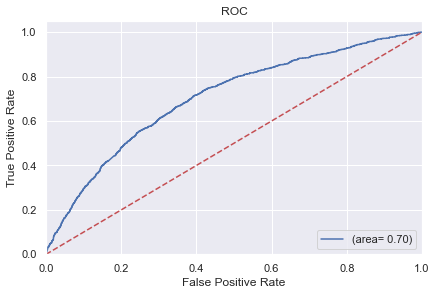

In [216]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_svm.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)
print('******'*15)

# model evaluation
y_pred_train = pipeline_svm.predict(X_train)
y_pred_test = pipeline_svm.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_svm, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
roc_auc_evaluation(X_test, y_test, pipeline_svm)

Hasil evaluasi matrics pada base model `SVC` menunjukkan bahwa nilai `accuracy` dari model cukup bagus yaitu `0.8` dan tidak ditemukan adanya overfitting maupun underfitting. Sedangkan pada matrics `f1-score` diperoleh hasil evaluasi yang cukup rendah `0.3`. Terakhir untuk matriks `ROC-AUC` diperoleh hasil yang tidak lebih baik dari pada base model `LogisticRegression` yaitu `0.7`. 

#### SVM with hyperparameter

In [217]:
svm_tunning = GridSearchCV(pipeline_svm, parameter_svm, cv=3, n_jobs=-1, verbose=1)
svm_tunning.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py",

  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/joblib/_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/fixes.py", line 211, in __call__
    return self.function(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 876, in _transform_one
    res = transformer.transform(X)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py", line 509, in transform
    X_int, X_mask = self._transform(
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/preproces

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/minicond

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                 

Best Parameter :
 {'algo__C': 1e-09, 'algo__gamma': 0.01}
******************************************************************************************
Confussion Matrix:
 [[2440 4868]
 [ 251  677]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.373
Accuracy (Test Set): 0.378


Precision (Train Set): 0.117
Precision (Test Set): 0.122


Recall (Train Set): 0.699
Recall (Test Set): 0.730


F1-Score (Train Set): 0.201
F1-Score (Test Set): 0.209
******************************************************************************************


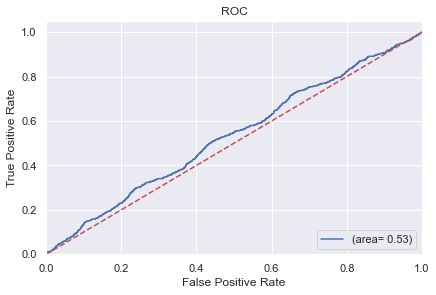

In [220]:
# Access the best set of parameters
best_pipe_svc = svm_tunning.best_estimator_
best_params_svc = svm_tunning.best_params_
print('Best Parameter :\n',best_params_svc)

print('******'*15)
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_svc.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = svm_tunning.predict(X_train)
y_pred_test = svm_tunning.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(svm_tunning, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, svm_tunning)


Hasil evaluasi matrics model `SVC` menggunakan hyperparameter tunning dengan `GridSearchCV` diperoleh parameter terbaik adalah `algo__C: 1e-09`, `algo__gamma: 0.01`. Hasil evaluasi dari matrics `accuracy`, `precision` dan `f1-score` menunjukkan nilai yang cukup rendah hal ini disebabkan oleh tingginya nilai dari `FP`, sedangkan hasil dari evaluasi matrics `recall` cukup tinggi karena pada matrics tidak memanfaatkan nilai dari `FP`. Untuk `ROC-AUC` diperoleh nilai evaluasi sebesar `0.53`. Sebagaimana `LogisticRegression` sebelumnya, hasil evaluasi model dari `SVC` dengan menggunakan hyperparameter tunning tidak lebih baik daripada sebelum dilakukan tunning atau pada base model.

### 7.3 Decision Tree

### Decision Tree Base Model

In [270]:
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[6849  459]
 [ 460  468]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 1.000
Accuracy (Test Set): 0.888


Precision (Train Set): 1.000
Precision (Test Set): 0.505


Recall (Train Set): 1.000
Recall (Test Set): 0.504


F1-Score (Train Set): 1.000
F1-Score (Test Set): 0.505
******************************************************************************************


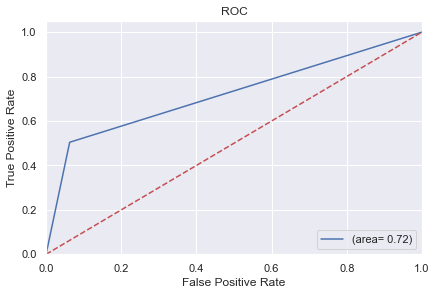

In [222]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_tree.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)
print('******'*15)

# model evaluation
y_pred_train = pipeline_tree.predict(X_train)
y_pred_test = pipeline_tree.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_tree, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
roc_auc_evaluation(X_test, y_test, pipeline_tree)

Hasil evaluasi dari base model `DecisionTree` ditemukan overfitting terhadap data train pada keseluruhan matrics. Sedangkan pada matrics `ROC-AUC` diperoleh nilai evaluasi `0.72`.

#### Decision Tree with Hyperparameter tunning

In [223]:
decision_tree_tunning = GridSearchCV(pipeline_tree, parameter_tree, cv=5, n_jobs=-1, verbose=1)
decision_tree_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                 

Best Parameter :
 {'algo__max_depth': 1, 'algo__min_samples_leaf': 2, 'algo__min_samples_split': 2}
******************************************************************************************
Confussion Matrix:
 [[7308    0]
 [ 928    0]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.887
Accuracy (Test Set): 0.887


Precision (Train Set): 0.000
Precision (Test Set): 0.000


Recall (Train Set): 0.000
Recall (Test Set): 0.000


F1-Score (Train Set): 0.000
F1-Score (Test Set): 0.000
******************************************************************************************


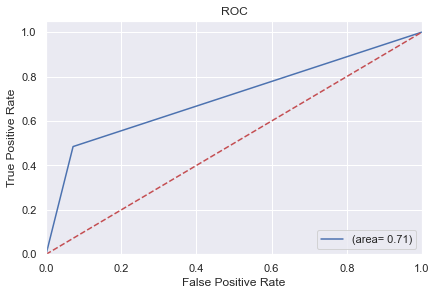

In [224]:
# Access the best set of parameters
best_pipe_tree = decision_tree_tunning.best_estimator_
best_params_tree = decision_tree_tunning.best_params_
print('Best Parameter :\n',best_params_tree)

print('******'*15)
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_tree.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = decision_tree_tunning.predict(X_train)
y_pred_test = decision_tree_tunning.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(decision_tree_tunning, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, decision_tree_tunning)


Hasil evaluasi matrics model `Decisiontree` menggunakan hyperparameter tunning dengan `GridSearchCV` diperoleh parameter terbaik adalah `algo__max_depth: 1`, `algo__min_samples_leaf: 2`, `algo__min_samples_split: 2`. Berdasarkan confussion matrix diperoleh nilai `TN ` nol, sehingga hal ini menyebabkan nilai matrics `precision`, `recall` dan `f1-score` juga nol. Sedangkan pada matrics `accuracy` diperoleh hasil yang cukup bagus yaitu `0.88`, hal ini cukup wajar karena rumus dari accuracy sendiri memiliki pembilang yang merupakan penjumlahan antara `TP` dan `TN`, pada confussion matrix sendiri `TN` diketahui. Untuk `ROC-AUC` diperoleh nilai evaluasi sebesar `0.71`. Hasil dari keseluruhan evaluasi base model `DecisionTree` dan `DecisionTree` dengan hyperparamater tunning menujukkan bahwa, pada kasus ini base model `DecisionTree` lebih baik dari pada setelah dilakukan tunning.

### 7.4 Random forest

In [225]:
pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[7089  219]
 [ 491  437]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 1.000
Accuracy (Test Set): 0.914


Precision (Train Set): 1.000
Precision (Test Set): 0.666


Recall (Train Set): 1.000
Recall (Test Set): 0.471


F1-Score (Train Set): 1.000
F1-Score (Test Set): 0.552
******************************************************************************************


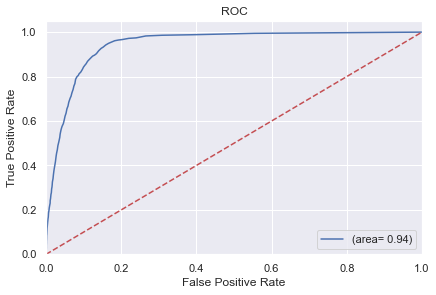

In [226]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_rfc.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)
print('******'*15)

# model evaluation
y_pred_train = pipeline_rfc.predict(X_train)
y_pred_test = pipeline_rfc.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_rfc, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
roc_auc_evaluation(X_test, y_test, pipeline_rfc)

Hasil evaluasi dari base model `DecisionTree` ditemukan overfitting terhadap data train pada keseluruhan matrics. Sedangkan pada matrics `ROC-AUC` diperoleh nilai evaluasi `0.94`.

#### Random Forest Classifier with Hyperparameter Tunning

In [227]:
rfc_tunning = GridSearchCV(pipeline_rfc, parameter_rfc, cv=3, n_jobs=-1, verbose=1)
rfc_tunning.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                 

Best Parameter :
 {'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1}
******************************************************************************************
Confussion Matrix:
 [[7027  281]
 [ 416  512]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.999
Accuracy (Test Set): 0.915


Precision (Train Set): 1.000
Precision (Test Set): 0.646


Recall (Train Set): 0.991
Recall (Test Set): 0.552


F1-Score (Train Set): 0.996
F1-Score (Test Set): 0.595
******************************************************************************************


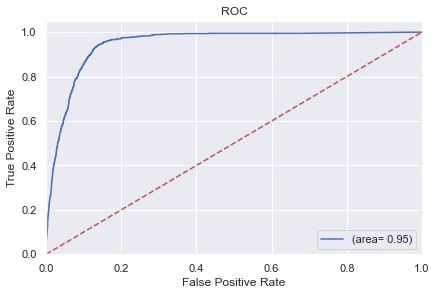

In [228]:
# Access the best set of parameters
best_pipe_rfc = rfc_tunning.best_estimator_
best_params_rfc = rfc_tunning.best_params_
print('Best Parameter :\n',best_params_rfc)

print('******'*15)
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_rfc.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = rfc_tunning.predict(X_train)
y_pred_test = rfc_tunning.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(rfc_tunning, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, rfc_tunning)


Hasil evaluasi matrics model `RandomForestClassifier` menggunakan hyperparameter tunning dengan `GridSearchCV` diperoleh parameter terbaik adalah `algo__max_depth: 20`, `algo__max_features: 0.3`, `algo__min_samples_leaf: 1`. Setelah dilakukan tunning hasil keseluruhan matrics evaluasi pada data test mengalami peningkatan, namun masih ditemukan adanya overfitting terhadap data train. Sedangkan hasil dari matrics `ROC-AUC` juga menunjukkan adanya kenaikan dari sebelum dilakukan tunning.

### 7.5 KNN

### KNN Base Model

In [231]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[7115  193]
 [ 699  229]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.915
Accuracy (Test Set): 0.892


Precision (Train Set): 0.753
Precision (Test Set): 0.543


Recall (Train Set): 0.363
Recall (Test Set): 0.247


F1-Score (Train Set): 0.490
F1-Score (Test Set): 0.339
******************************************************************************************


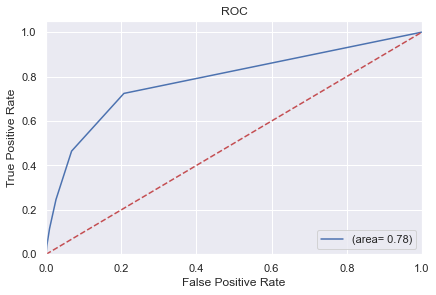

In [230]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_knn.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = pipeline_knn.predict(X_train)
y_pred_test = pipeline_knn.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_knn, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, pipeline_knn)

Hasil evaluasi dari base model `KNN` diperoleh hasil accuracy yang cukup tinggi yaitu `0.8`. Sedangkan pada matrics `presition`, `recall` dan `f1-score` cukup rendah. Sedangkan untuk matrics `ROC-AUC` diperoleh hasil `0.78`.

#### KNN with Hyperparameter Tunning

In [232]:
knn_tunning = RandomizedSearchCV(pipeline_knn, parameter_knn, cv=3)
knn_tunning.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'duration',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf

Best Parameter :
 {'algo__n_neighbors': 1}
******************************************************************************************
Confussion Matrix:
 [[6889  419]
 [ 590  338]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 1.000
Accuracy (Test Set): 0.877


Precision (Train Set): 1.000
Precision (Test Set): 0.446


Recall (Train Set): 1.000
Recall (Test Set): 0.364


F1-Score (Train Set): 1.000
F1-Score (Test Set): 0.401
******************************************************************************************


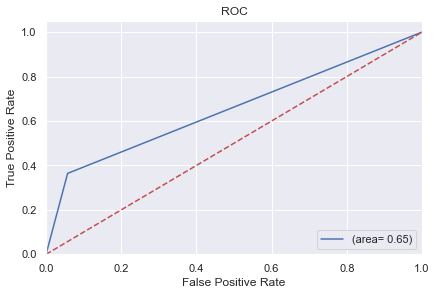

In [233]:
# Access the best set of parameters
best_pipe_knn = knn_tunning.best_estimator_
best_params_knn = knn_tunning.best_params_
print('Best Parameter :\n',best_params_knn)

print('******'*15)
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_knn.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = knn_tunning.predict(X_train)
y_pred_test = knn_tunning.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(knn_tunning, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, knn_tunning)


Setelah dilakukan tunning diperoleh hasil evaluasi matrics yang cukup overfitting dibandingkan tanpa hyperparameter tunning.

### 7.6 Naive bayes

#### Base model Naive Bayes

In [235]:
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[6066 1242]
 [ 282  646]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.809
Accuracy (Test Set): 0.815


Precision (Train Set): 0.330
Precision (Test Set): 0.342


Recall (Train Set): 0.675
Recall (Test Set): 0.696


F1-Score (Train Set): 0.443
F1-Score (Test Set): 0.459
******************************************************************************************


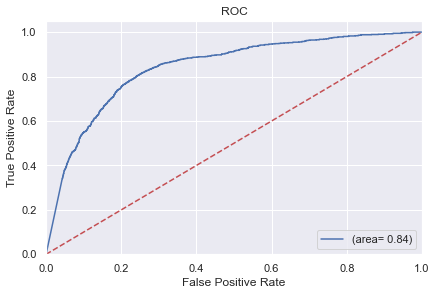

In [236]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_nb.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = pipeline_nb.predict(X_train)
y_pred_test = pipeline_nb.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_nb, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, pipeline_nb)


Hasil evaluasi matrics dari base model `NaiveBayes`, diperoleh hasil yang cukup bagus pada matrics `recall` yaitu `0.69`, accuracy `0.8` dan ROC-AUC `0.84`. Sedangkan pada matrics `precision` dan `f1-score` hasil yang diperoleh cukup rendah yaitu kurang dari `0.5`.

### 7.7 ADA-boost

#### ADAboost Base Model

In [237]:
pipeline_adaboost.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[7111  197]
 [ 542  386]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.910
Accuracy (Test Set): 0.910


Precision (Train Set): 0.668
Precision (Test Set): 0.662


Recall (Train Set): 0.408
Recall (Test Set): 0.416


F1-Score (Train Set): 0.507
F1-Score (Test Set): 0.511
******************************************************************************************


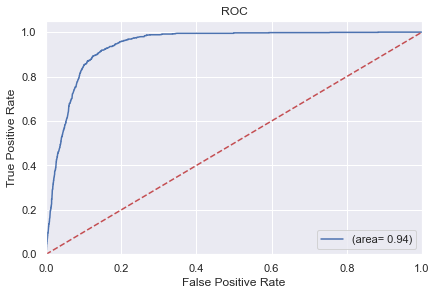

In [238]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_adaboost.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = pipeline_adaboost.predict(X_train)
y_pred_test = pipeline_adaboost.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_adaboost, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, pipeline_adaboost)


Hasil evaluasi matrics dari base model `Adaboost`, diperoleh hasil yang cukup baik pada matrics `precision` yaitu `0.66`, accuracy `0.9` dan ROC-AUC `0.94`. Sedangkan pada matrics `recall` dan `f1-score` hasil yang diperoleh cukup rendah yaitu kurang dari `0.5`.

#### ADAboost with hyperparameter tunning

In [239]:
adaboost_tunning = GridSearchCV(pipeline_adaboost, parameter_adboost, cv=3, n_jobs=-1, verbose=1)
adaboost_tunning.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/Users/diakurnia/opt/miniconda3/lib/python3.9/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                 

Best Parameter :
 {'algo__learning_rate': 0.001, 'algo__n_estimators': 100}
******************************************************************************************
Confussion Matrix:
 [[7308    0]
 [ 928    0]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.887
Accuracy (Test Set): 0.887


Precision (Train Set): 0.000
Precision (Test Set): 0.000


Recall (Train Set): 0.000
Recall (Test Set): 0.000


F1-Score (Train Set): 0.000
F1-Score (Test Set): 0.000
******************************************************************************************


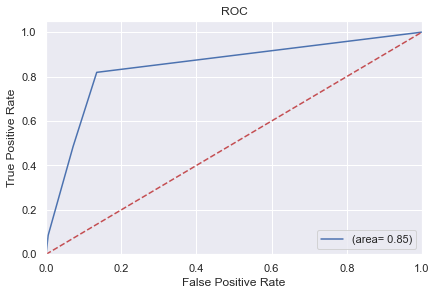

In [240]:
# Access the best set of parameters
best_pipe_adb = adaboost_tunning.best_estimator_
best_params_adb = adaboost_tunning.best_params_
print('Best Parameter :\n',best_params_adb)

print('******'*15)
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_adb.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = adaboost_tunning.predict(X_train)
y_pred_test = adaboost_tunning.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(adaboost_tunning, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, adaboost_tunning)


# 7.8 XGboost

#### XG-boost benchmark model

In [241]:
pipeline_xgboost.fit(X_train, y_train)

[20:22:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categoric', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
           

Confussion Matrix:
 [[7012  296]
 [ 409  519]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.960
Accuracy (Test Set): 0.914


Precision (Train Set): 0.884
Precision (Test Set): 0.637


Recall (Train Set): 0.745
Recall (Test Set): 0.559


F1-Score (Train Set): 0.808
F1-Score (Test Set): 0.596
******************************************************************************************


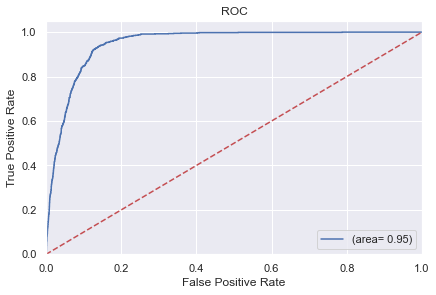

In [242]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, pipeline_xgboost.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = pipeline_xgboost.predict(X_train)
y_pred_test = pipeline_xgboost.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(pipeline_xgboost, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, pipeline_xgboost)


Hasil evaluasi dari base model `XG-boost` ditemukan adanya overfitting pada matrics `precision`, `recall` dan `f1-score`. Sedangkan pada matrics `accuracy` hasil yang diperoleh cukup bagus yaitu `0.9` dan pada matrics `ROC-AUC` diperoleh nilai evaluasi `0.95`.

#### XG-boost with hyperparameter tunning

In [244]:
xgb_tunning = RandomizedSearchCV(pipeline_xgboost, parameter_xgb, cv=5)
xgb_tunning.fit(X_train, y_train)

[20:37:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[20:40:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'duration',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf

Best Parameter :
 {'algo__lambda': 0.5, 'algo__gamma': 0.5, 'algo__alpha': 1.0}
******************************************************************************************
Confussion Matrix:
 [[7016  292]
 [ 421  507]]
******************************************************************************************

Hasil Evaluasi dari model:

Accuracy (Train Set): 0.961
Accuracy (Test Set): 0.913


Precision (Train Set): 0.885
Precision (Test Set): 0.635


Recall (Train Set): 0.747
Recall (Test Set): 0.546


F1-Score (Train Set): 0.810
F1-Score (Test Set): 0.587
******************************************************************************************


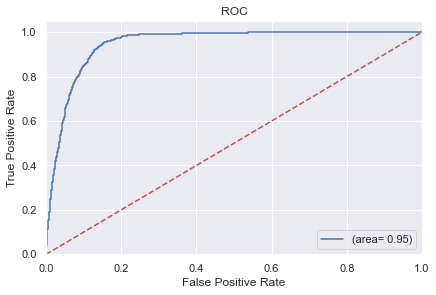

In [245]:
# Access the best set of parameters
best_pipe_xgb = xgb_tunning.best_estimator_
best_params_xgb = xgb_tunning.best_params_
print('Best Parameter :\n',best_params_xgb)

print('******'*15)
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_xgb.predict(X_test))
print('Confussion Matrix:\n', cf_matrix)

print('******'*15)
# model evaluation
y_pred_train = xgb_tunning.predict(X_train)
y_pred_test = xgb_tunning.predict(X_test)
print('\nHasil Evaluasi dari model:\n')
eval_classification(xgb_tunning, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test)

print('******'*15)
# eoc auc evaluation
roc_auc_evaluation(X_test, y_test, xgb_tunning)


#### Summary Evaluation

In [297]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

models = {
    'Logistic Regression':pipeline_logreg,
    'SVM':pipeline_svm,
    'Decision Tree':pipeline_tree,
    'Random Forest T':best_pipe_rfc,
    'KNN T':best_pipe_knn,
    'Naive Bayes': pipeline_nb,
    'Ada-Boost':pipeline_adaboost,
    'XG-Boost T':best_pipe_xgb,
}

metrics = {
    'accuracy': accuracy_score,
    'f1-score':f1_score,
}

df_model = pd.DataFrame(columns=models.keys(), index=['accuracy', 'f1-score'])
df_model.index.name='Metrics'

for metric in metrics.keys():
    for model in models.keys():
        df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))
        fpr, tpr, thresholds = roc_curve(y_test, models[model].predict_proba(X_test)[:,1])
        df_model.loc['ROC-AUC', model] = auc(fpr,tpr)

In [298]:
df_model

,Logistic Regression,SVM,Decision Tree,Random Forest T,KNN T,Naive Bayes,Ada-Boost,XG-Boost T
Metrics,,,,,,,,
accuracy,0.909786,0.802574,0.88696,0.915372,0.877489,0.814959,0.910272,0.913429
f1-score,0.501677,0.303342,0.501873,0.595003,0.401187,0.458807,0.51092,0.587145
ROC-AUC,0.937891,0.704577,0.720401,0.946886,0.653445,0.840466,0.941055,0.948127


In [286]:
def evaluation_comparation(eval):
    plt.figure(figsize=(10,4))
    ax = sns.barplot(x ='index', y=eval, data=df_model.T.reset_index(), palette = 'rocket' )
    x_offset = -0.03
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.3f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.title('{} Evaluation'.format(eval),
             loc='center', pad=10, fontsize=15, color='brown')
    plt.ylabel('Probability')
    plt.xlabel('Model Name')

(None, None, None)

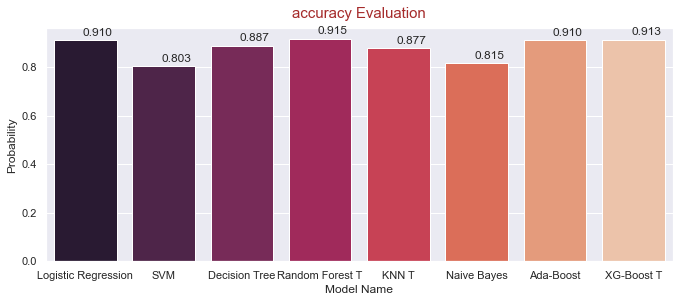

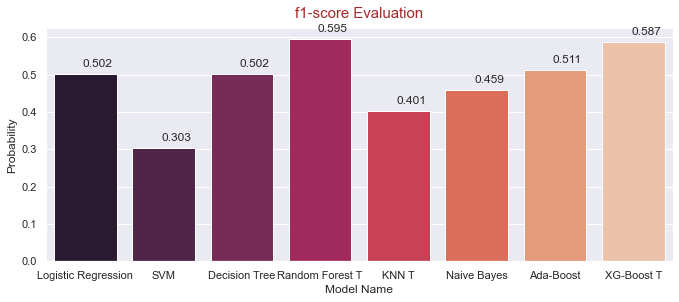

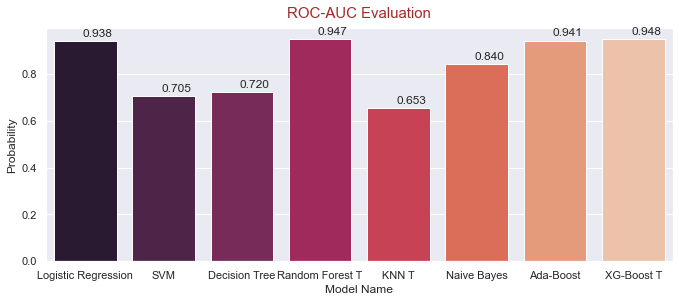

In [304]:
evaluation_comparation('accuracy'), evaluation_comparation('f1-score'), evaluation_comparation('ROC-AUC')

Berdasarkan bar plot diatas yang menunjukkan perbandingan matrics evaluasi pada setiap model, dapat di tarik kesimpulan hasil dari matrics `accuracy`, `f1-score` dan `ROC-AUC` terbaik ditemukan pada model `Random forest` dengan hyperparameter tunning. Perlu diingat bahwa data yang digunakan memiliki `imbalance` yang cukup ektrim oleh karena itu  matrics yang seharusnya menjadi acuan utama adalah `f1-score`.

# 8. Model inference

In [288]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36454,24,technician,single,professional.course,no,no,no,cellular,jun,tue,122,2,999,1,failure,-2.9,92.963,-40.8,1.262,5076.2
1233,32,blue-collar,married,professional.course,no,no,no,telephone,may,thu,1119,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
24111,33,self-employed,single,university.degree,no,no,no,telephone,nov,thu,168,1,999,0,nonexistent,-0.1,93.200,-42.0,4.245,5195.8
15516,38,entrepreneur,married,basic.9y,no,no,yes,telephone,jul,fri,129,4,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1
17916,39,services,married,high.school,no,yes,yes,cellular,jul,tue,197,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1


In [292]:
data = [
    [25, 'admin.', 'single', 'university.degree', 'no', 'no', 
     'no', 'cellular', 'may', 'thu', 522, 2, 999,1,'nonexistent', 1.1, 
     85.43,-40.3,2.123, 5091.8 ],
    [40, 'services', 'married', 'university.degree', 'no', 'yes', 'no', 
     'cellular', 'may', 'tue', 1000, 1,999,0,'nonexistent',1.5, 97.32,
    -41.5,1.345, 5221.9]
]

In [293]:
X_pred = pd.DataFrame(data, index=["cust1", "cust2"], columns = X.columns)

#### Random forest Prediction

In [295]:
best_pipe_rfc.predict(X_pred)

array([0, 1])

# 9.Summary analysis

- Dataset `Bank Telemarketing` terdiri dari `41188` baris dan `21` kolom, dengan kolom targetnya dalah `y` yang merepresentasikan apakah nasabah akan melakukan subscription term deposit atau tidak.
- Pada kolom target ditemukan adanya perbedaan jumlah value yang signifikan antara yang `yes` dan `no`.
- Berdasarkan statistik deskriptif diperoleh informasi yang berkaitan dengan identitas nasabah yaitu rata-rata usia nasabah adalah 40 tahun, sudah menikah, memiliki pinjaman rumah, lulusan universitas dan memiliki pekerjaan sebagai admin.
- Pada tahap modelling dengan mengimplementasikan pada 8 model yang berbeda dengan menggunakan base model dan melakukan hyperparameter tunning, diperoleh hasil evaluasi terbaik secara keseluruhan baik menggunakan `accuracy`, `precision`, `recall` dan `roc-auc` evaluasi terbaik terdapat pada model `xg-boost` dan `random forest classifier` dengan hyperparameter tunning.
- Hasil model inference dengan menggunakan dua data acak pada kedua model tersebut menunjukkan hasil prediksi yang sama.